<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64

Total number of responses:  28858


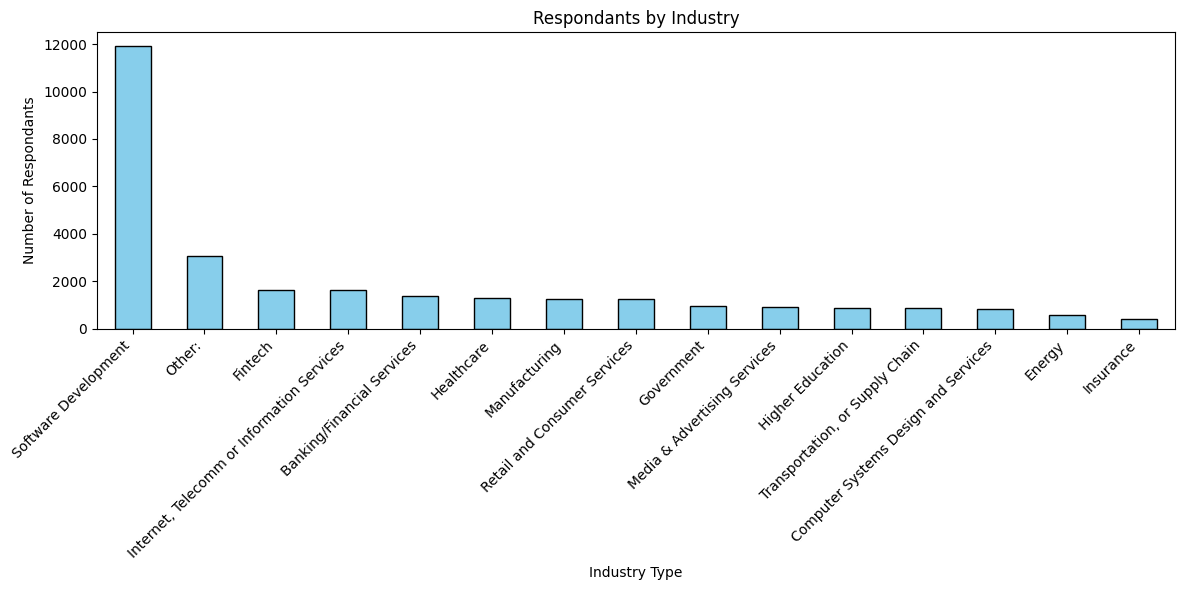

In [3]:
##Write your code here
# Showing the different industries available and total
print(df['Industry'].value_counts())
print('\nTotal number of responses: ', df['Industry'].value_counts().sum())

# Assigning needed column
df_industry = df['Industry'].value_counts()

plt.figure(figsize=(12, 6))
df_industry.plot(kind='bar', color = 'skyblue', edgecolor='black')
plt.title('Respondants by Industry')
plt.xlabel('Industry Type')
plt.ylabel('Number of Respondants')
plt.ylim(0, 12500)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We have responses from only 44% of the total dataset for this question. Of those who did respond, 41% reported working in Software Development, making it the dominant industry among participants.

What stands out is the “Other” category — the second highest, with 10.6% of respondents selecting it. This is surprising given the broad range of available industry options. It suggests that many participants may work in multi-disciplinary roles, start-ups, or niche sectors that don’t fit neatly into any one category. Fields like research, edtech, or non-profits might not be clearly represented, prompting respondents to choose “Other.”

This pattern reflects how technology has blurred traditional industry lines. Programming and tech roles now span nearly every sector, and clear-cut categorizations are becoming less relevant as industries converge and evolve.

Another possible reason for the relatively low number of responses is the length and intensity of the survey. This question appears after more than 100 others, and by that point, respondent fatigue may have set in. With more complete data, we might see more representation across traditional industries — or, as the current trend suggests, an even greater rise in the “Other” category.

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
# Basic stats for required column
print(df['ConvertedCompYearly'].describe())

# Assigning values
comp_std = df['ConvertedCompYearly'].std()
comp_mean = df['ConvertedCompYearly'].mean()
comp_median = df['ConvertedCompYearly'].median()

# Printing calculated values
print('\nStandard Deviation is: ', '{:.2f}'.format(float(comp_std)))
print('Mean is: ', '{:.2f}'.format(float(comp_mean)))
print('Median is: ', '{:.2f}'.format(float(comp_median)))

# Basic calculations for getting 3*standard variation above mean
comp_3std = 3 * comp_std
comp_threshold = comp_mean + comp_3std
print('Threshold to find the extremely high values is 3 times the Standard Deviation: ', '{:.2f}'.format(float(comp_threshold)))
comp_above_thresh = df[df['ConvertedCompYearly'] > comp_threshold]

# Printing the totals and found values
print('\nTotal number of extreme high rows: ', comp_above_thresh['ConvertedCompYearly'].shape[0])
print('\nExtreme high values are: \n', comp_above_thresh['ConvertedCompYearly'].value_counts())

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Standard Deviation is:  186756.97
Mean is:  86155.29
Median is:  65000.00
Threshold to find the extremely high values is 3 times the Standard Deviation:  646426.21

Total number of extreme high rows:  89

Extreme high values are: 
 ConvertedCompYearly
750000.0      11
1000000.0      6
650000.0       4
700000.0       4
1200000.0      4
1500000.0      3
800000.0       3
1074062.0      2
1188001.0      2
859250.0       2
2000000.0      2
1302817.0      1
1031099.0      1
1052581.0      1
1184707.0      1
950000.0       1
945000.0       1
1273879.0      1
798000.0       1
13818022.0     1
1332930.0      1
660660.0       1
803285.0       1
2048046.0      1
1728025.0      1
670000.0       1
1750749.0      1
16256603.0     1
740517.0       1
1550391.0      1
6340564.0      1
49

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


First quartile of column is: 32712.0
Third quartile of column is: 107971.5
Interquartile range of column is: 75259.5

Lower bounds of outlier is: -80177.25
Upper bounds of outlier is: 220860.75 



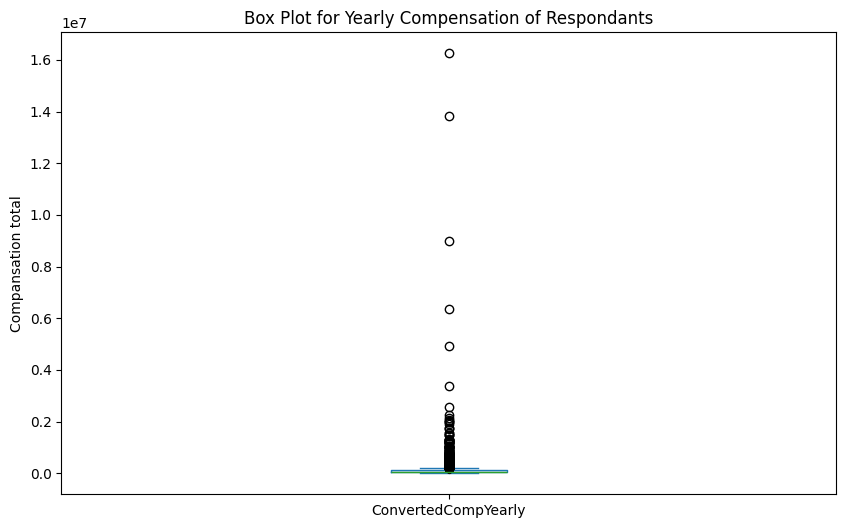

In [5]:
##Write your code here
# IQR for column
comp_q1 = df['ConvertedCompYearly'].quantile(0.25)
comp_q3 = df['ConvertedCompYearly'].quantile(0.75)
comp_iqr = comp_q3 - comp_q1

print('First quartile of column is:', comp_q1)
print('Third quartile of column is:', comp_q3)
print('Interquartile range of column is:', comp_iqr)

# Computing upper and lower bounds of outliers
comp_lower = comp_q1 - (1.5 * comp_iqr)
comp_upper = comp_q3 + (1.5 * comp_iqr)
print('\nLower bounds of outlier is:', comp_lower)
print('Upper bounds of outlier is:', comp_upper, '\n')

# Plotting
df['ConvertedCompYearly'].plot(kind='box', figsize=(10,6))
plt.title('Box Plot for Yearly Compensation of Respondants')
plt.ylabel('Compansation total')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
comp_outlier = df[(df['ConvertedCompYearly'] < comp_lower) | (df['ConvertedCompYearly'] > comp_upper)]
comp_no_outlier = df[(df['ConvertedCompYearly'] > comp_lower) & (df['ConvertedCompYearly'] < comp_upper)]

print('Total outliers in data is:', comp_outlier.shape[0])
print('Total data without outliers is:', comp_no_outlier.shape[0])


Total outliers in data is: 978
Total data without outliers is: 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Pearson correlation is: 
                           Age  ConvertedCompYearly
Age                  1.000000             0.123125
ConvertedCompYearly  0.123125             1.000000
Spearman correlation is: 
                           Age  ConvertedCompYearly
Age                  1.000000             0.411362
ConvertedCompYearly  0.411362             1.000000


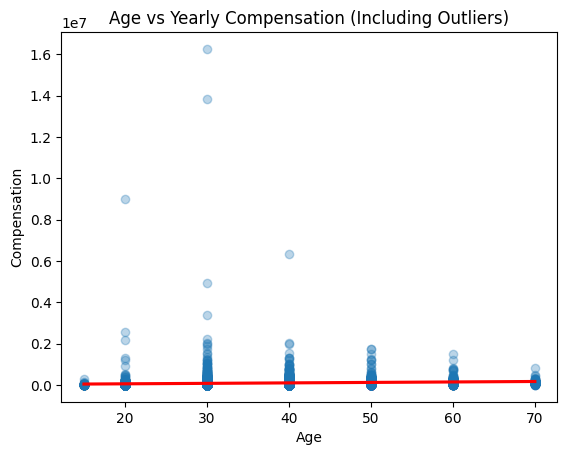


Pearson correlation is: 
                           Age  ConvertedCompYearly
Age                  1.000000             0.374554
ConvertedCompYearly  0.374554             1.000000
Spearman correlation is: 
                           Age  ConvertedCompYearly
Age                  1.000000             0.405334
ConvertedCompYearly  0.405334             1.000000



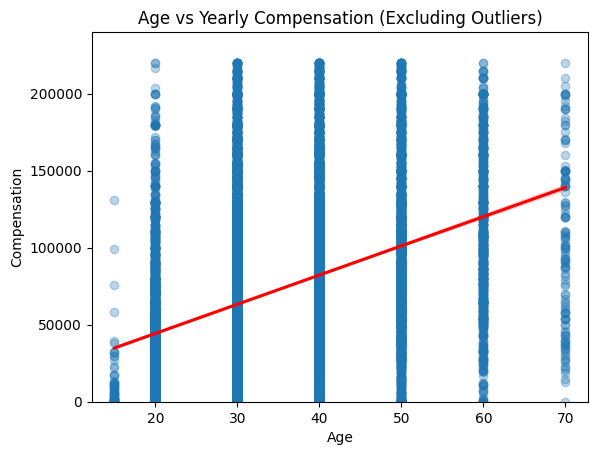

In [7]:
##Write your code here
# Making copy of data
df_age_comp = df[['Age', 'ConvertedCompYearly']].copy()

# Mapping labels for correlation
age_numeric_map = {
    'Under 18 years old': 15,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}

# Applying mapping to data (swapping original column values) and cleaning missing values
df_age_comp['Age'] = df_age_comp['Age'].map(age_numeric_map)
cleaned_df = df_age_comp.dropna()

# Applying both Pearson and Spearman correlation checks
print('Pearson correlation is: \n', cleaned_df.corr())
print('Spearman correlation is: \n', cleaned_df.corr(method='spearman'))

# Plotting scatter
sns.regplot(
    data=cleaned_df,
    x='Age',
    y='ConvertedCompYearly',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'},
)

plt.title('Age vs Yearly Compensation (Including Outliers)')
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.show()


# Cleaning data from outliers to plot
cleaned_df_no_out = cleaned_df[(cleaned_df['ConvertedCompYearly'] > comp_lower) & (cleaned_df['ConvertedCompYearly'] < comp_upper)]

# Checking correlations after removed outliers
print('\nPearson correlation is: \n', cleaned_df_no_out.corr())
print('Spearman correlation is: \n', cleaned_df_no_out.corr(method='spearman'))
print()

# Making new plot without outlier data
# Plotting scatter
sns.regplot(
    data=cleaned_df_no_out,
    x='Age',
    y='ConvertedCompYearly',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'},
)

plt.title('Age vs Yearly Compensation (Excluding Outliers)')
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.ylim(0, 240000)
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
